# Lab03: Linear Regression and Decision Tree.

- Student ID: 20120201
- Student name: Phạm Gia Thông

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.
- Decision Tree.

## Linear Regression

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n)$.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.
![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.
![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [16]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

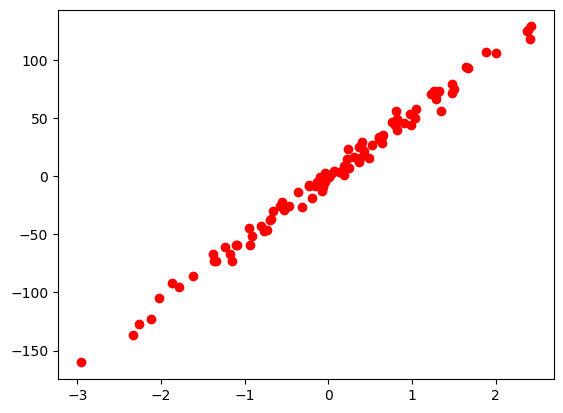

In [17]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()


**TODO:** 

- Your observation about data:

+) The input variable and output variable data points respectively are almost lined up, centered around a line with constant equation (d), the number of points is large, so it is good for using Linear Regression.

+) The amount of input data is sufficient, simple and fairly evenly distributed around (d) so the regression line is less affected by noise components.

#### Training function

In [18]:
def tichvohuong(a,b):
    i = 0
    j = 0
    tichvoh = 0
    for i,j in zip(a,b):
        tichvoh += i*j
        
    return tichvoh

def Nhanmatran(A,B):
    if(len(A[0]) != len(B)):
        return []
    
    C = []
    
    D = np.transpose(B)
    for i in A:
        sup = []
        for j in D:
            s = tichvohuong(i, j)
            sup.append(s)
            
        C.append(sup)
        
    return C

def update_weights(X_train, y_train):
    # the way is to solve the derivative (gradient) equation
    predictions = Nhanmatran(np.transpose(X_train), X_train)        #np.dot(X_train.T, X_train)     #X_train.T @ X_train    #X_train.T * X_train 
    weights_delta = np.dot(np.transpose(X_train), y_train)          #X_train.T @ y_train    #X_train.T * y_train 
    
    return np.linalg.pinv(predictions) @ weights_delta              #np.dot(np.linalg.pinv(predictions), weights_delta)

def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    w = update_weights(X, y)
    
    return w

In [19]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
one_added_X = np.zeros((len(X), len(X[0]) + 1))
one_added_X[:,0] = 1
one_added_X[:,1:len(X[0]) + 1] = X[:,0:len(X[0])]

print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)


one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-3.2306161945825704, 2.694788460241901)

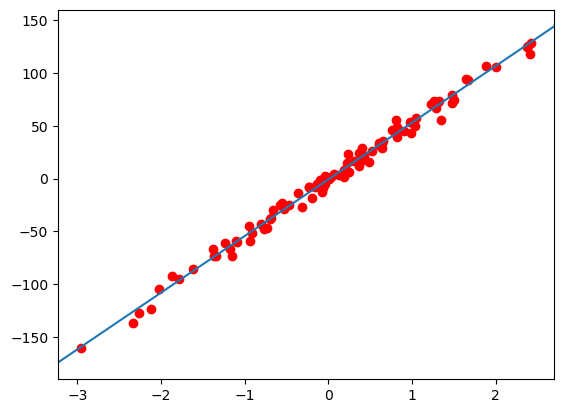

In [20]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
ones_added_xs=np.hstack((np.ones((xs.shape[0], 1)), xs))


predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)




- **TODO**: Discuss about advantages and disadvantages of `Linear Regression`:

`Advantages`:

* Linear Regression is a haploid linear regression model, popular and simple to implement.

* The model has a fast and simple processing speed, so it has the advantage in processing large amounts of data and brings short linear regression execution time.

* Because the model is fast processing, it is useful when the relationship between variables is not too complicated and there is not much data.

* Widely applied in business fields such as surveying a large number of consumers; house price prediction, gold price,...


`Disadvantages`:

* Only study data with 2 variables (independent and dependent), do not fully describe the complex relationship between variables in reality, apply to quantitative variables and the whole data is susceptible to noise by a certain amount small data.

* For non-linear data, linear regression cannot represent the relationship between independent and dependent variables in the real world.

* Also, polynomial regression can be quite difficult to design, exhibiting non-linear relationships because one must have some information about the structure of the data and the relationship between the feature variables before embark on model design.

* This model gives bad results compared to other models when we have to process data with higher complexity, processing on a data set with many features.

* Linear regression is very sensitive to outliers that greatly affect the output, so they must be treated before using linear regression.

***

## Decision Tree

### 1. Import Library

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

### 2. Load Iris dataset

In [22]:
from sklearn.model_selection import train_test_split
iris=datasets.load_iris()

X=iris.data
y=iris.target

#split dataset into training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

### 3. Decision Tree: Iterative Dichotomiser 3 (ID3)

#### 3.1 Information Gain

Expected value of the self-information (entropy):

$$Entropy=-\sum_{i}^{n}p_ilog_{2}(p_i)$$

The entropy function gets the smallest value if there is a value of $p_i$ equal to 1, reaches the maximum value if all $ p_i $ are equal. These properties of the entropy function make it is an expression of the disorder, or randomness of a system, ...

In [23]:
def entropy(counts, n_samples):
    """
    Parameters:
    -----------
    counts: shape (n_classes): list number of samples in each class
    n_samples: number of data samples
    
    -----------
    return entropy 
    """
    #TODO
    entropy = 0
    for i in range(len(counts)):
        if counts[i] != 0:
            entropy -= (counts[i] * 1.0 / n_samples) * np.log2(counts[i] * 1.0 / n_samples)
    
    return entropy

In [24]:
def entropy_of_one_division(division): 
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    n_samples = len(division)
    n_classes = set(division)
    
    counts=[]
    #count samples in each class then store it to list counts
    #TODO:
    for samples in n_classes:
        sum = 0
        for i in range (n_samples):
            if(samples == division[i]):
                sum += 1
        
        counts.append(sum)     
    
    return entropy(counts,n_samples),n_samples


def get_entropy(y_predict, y):
    """
    Returns entropy of a split
    y_predict is the split decision by cutoff, True/Fasle
    """
    n = len(y)
    entropy_true, n_true = entropy_of_one_division(y[y_predict]) # left hand side entropy
    entropy_false, n_false = entropy_of_one_division(y[~y_predict]) # right hand side entropy
    # overall entropy
    #TODO s=?
    s = (n_true * 1 / n) * entropy_true + (n_false * 1 / n) * entropy_false
    
    return s

The information gain of classifying information set D by attribute A:
$$ Gain(A)=Entrophy(D)-Entrophy_{A}(D)$$

At each node in ID3, an attribute is chosen if its information gain is highest compare to others.

All attributes of the Iris set are represented by continuous values. Therefore we need to represent them with discrete values. The simple way is to use a `cutoff` threshold to separate values of the data on each attribute into two part:` <cutoff` and `> = cutoff`.

To find the best `cutoff` for an attribute, we replace` cutoff` with its values then compute the entropy, best `cutoff` achieved when value of entropy is smallest  $ \left (\arg \min Entrophy_ {A} (D) \right) $.

#### 3.2 Decision tree

In [25]:
class DecisionTreeClassifier:
    def __init__(self, tree=None, depth=0):
        '''Parameters:
        -----------------
        tree: decision tree
        depth: depth of decision tree after training'''
        
        self.depth = depth
        self.tree=tree
    def fit(self, X, y, node={}, depth=0):
        '''Parameter:
        -----------------
        X: training data
        y: label of training data
        ------------------
        return: node 
        
        node: each node represented by cutoff value and column index, value and children.
         - cutoff value is thresold where you divide your attribute
         - column index is your data attribute index
         - value of node is mean value of label indexes, 
           if a node is leaf all data samples will have same label
        
        Note that: we divide each attribute into 2 part => each node will have 2 children: left, right.
        '''
        
        #Stop conditions
        
        #if all value of y are the same 
        if np.all(y==y[0]):
            return {'val':y[0]}

        else: 
            col_idx, cutoff, entropy = self.find_best_split_of_all(X, y)    # find one split given an information gain 
            y_left = y[X[:, col_idx] < cutoff]
            y_right = y[X[:, col_idx] >= cutoff]
            node = {'index_col':col_idx,
                        'cutoff':cutoff,
                   'val':np.mean(y)}
            node['left'] = self.fit(X[X[:, col_idx] < cutoff], y_left, {}, depth+1)
            node['right'] = self.fit(X[X[:, col_idx] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.tree = node
            return node
    
    def find_best_split_of_all(self, X, y):
        col_idx = None
        min_entropy = 1
        cutoff = None
        for i, col_data in enumerate(X.T):
            entropy, cur_cutoff = self.find_best_split(col_data, y)
            if entropy == 0:                   #best entropy
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col_idx = i
                cutoff = cur_cutoff
               
        return col_idx, cutoff, min_entropy
    
    def find_best_split(self, col_data, y):
        ''' Parameters:
        -------------
        col_data: data samples in column'''
         
        min_entropy = 10

        #Loop through col_data find cutoff where entropy is minimum
        
        for value in set(col_data):
            y_predict = col_data < value
            my_entropy = get_entropy(y_predict, y)
            #TODO
            #min entropy=?, cutoff=?
            if min_entropy > my_entropy:
                min_entropy = my_entropy
                cutoff = value
            
        return min_entropy, cutoff
                                               
    def predict(self, X):
        tree = self.tree
        pred = np.zeros(shape=len(X))
        for i, c in enumerate(X):
            pred[i] = self._predict(c)
        return pred
    
    def _predict(self, row):
        cur_layer = self.tree
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')

#### 3.3 Classification on Iris Dataset

In [26]:
model = DecisionTreeClassifier()
tree = model.fit(X_train, y_train)
pred=model.predict(X_train)
print('Accuracy of your decision tree model on training data:', accuracy_score(y_train,pred))
pred=model.predict(X_test)
print('Accuracy of your decision tree model:', accuracy_score(y_test,pred))


Accuracy of your decision tree model on training data: 1.0
Accuracy of your decision tree model: 0.96


**TODO**: F1, Recall and Precision report

`Precision`: Indicates how correct the percentage of predictions compared to the total number of predictions.

`Recall`: Indicates the percentage of correct predictions compared to the total number of predictions in reality.

`F1 Score`: Indicates the weighted harmonic mean of accuracy and recall. The closer the value is to 1, the better the model represents the metric.
        
        F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

In [27]:
from sklearn.metrics import classification_report
target = ['first', 'second', 'third']
print(classification_report(y_test, pred, target_names= target))

              precision    recall  f1-score   support

       first       1.00      1.00      1.00        19
      second       0.93      0.93      0.93        15
       third       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



`Precision`: Out of all the particulars that the model prognosticated would get drafted, only 94% actually did.

`Recall`: Out of all the particulars that actually did get drafted, the model only prognosticated this outgrowth rightly for 94% of those particulars.

`F1 Score`: This value is calculated as:
* F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
* F1 Score: 2 * (.94 * .94) / (.94 + .94)
* F1 Score: 0.94